# R Project Part 1 , BIOL-696, SDSU
## Geneva Porter, 13 March 2020 

In [2]:
# install.packages("picante", dependencies=TRUE)
library(picante)
load("R_biodiversity_workspace.RData")

# Workshop files have been placed in same directory as .ipynb file
# Remarks about each task are given at the end of each section.

Loading required package: ape
Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.5-6
Loading required package: nlme


In [3]:
# Community Data

comm <- read.csv("grassland_data/grassland.community.csv", 
                 header = TRUE, row.names = 1)
head(colnames(comm))
comm <- decostand(comm, method = "total")
apply(comm, 1, sum)

[1] "Antennaria_parvifolia"                  
[2] "Artemisia_cana"                         
[3] "Artemisia_frigida"                      
[4] "Symphyotrichum_ericoides_var._ericoides"
[5] "Bouteloua_gracilis"                     
[6] "Carex_filifolia"

mix-O-1  mix-O-2  mix-O-3  mix-O-4  mix-O-5  mix-O-6  mix-O-7  fes-K-8 
       1        1        1        1        1        1        1        1 
 fes-K-9 fes-K-10 fes-K-11 fes-K-12 fes-K-13 fes-K-14 fes-K-15 fes-K-16 
       1        1        1        1        1        1        1        1 
fes-K-17 mix-H-18 mix-H-19 mix-H-20 mix-H-21 mix-H-22 mix-H-23 mix-H-24 
       1        1        1        1        1        1        1        1 
mix-H-25 mix-H-26 mix-H-27 
       1        1        1

## Remarks:

The abundance was measured and then normalized, so that each species amount is given as a proportion of the total.

SLA      LeafArea  LeafThickness SLV      
Achillea_millefolium   140.2663  9.275390 0.4163333      59.56525
Allium_textile         137.7006  2.445361 0.9147222     125.69496
Amelanchier_alnifolia  156.1014 14.064856 0.2900000      45.45227
Androsace_occidentalis 257.2050  0.274745 0.2535000      84.22189
Antennaria_neglecta    171.0442  1.731990 0.2810000      48.14442
Antennaria_parvifolia  193.8718  0.317200 0.2466667      47.64151
                       LeafTissueDens SRL       SRV       RootTissueDens
Achillea_millefolium   0.018085428     74.14570  5.038776 0.2553510     
Allium_textile         0.008137136    187.85485 14.013757 0.1049986     
Amelanchier_alnifolia  0.022841232     20.87560  2.518939 0.5039683     
Androsace_occidentalis 0.017706402    207.45582  3.291592 0.4071078     
Antennaria_neglecta    0.020920233    124.73397  6.710526 0.1593750     
Antennaria_parvifolia  0.021048340     44.93859  4.003997 0.2504167     
                       RootDiam 
Achillea_millefolium   0.3123600
Allium_textile         0.3107833
Amelanchier_alnifolia  0.3760667
Androsace_occidentalis 0.1148714
Antennaria_neglecta    0.2749500
Antennaria_parvifolia  0.3495500

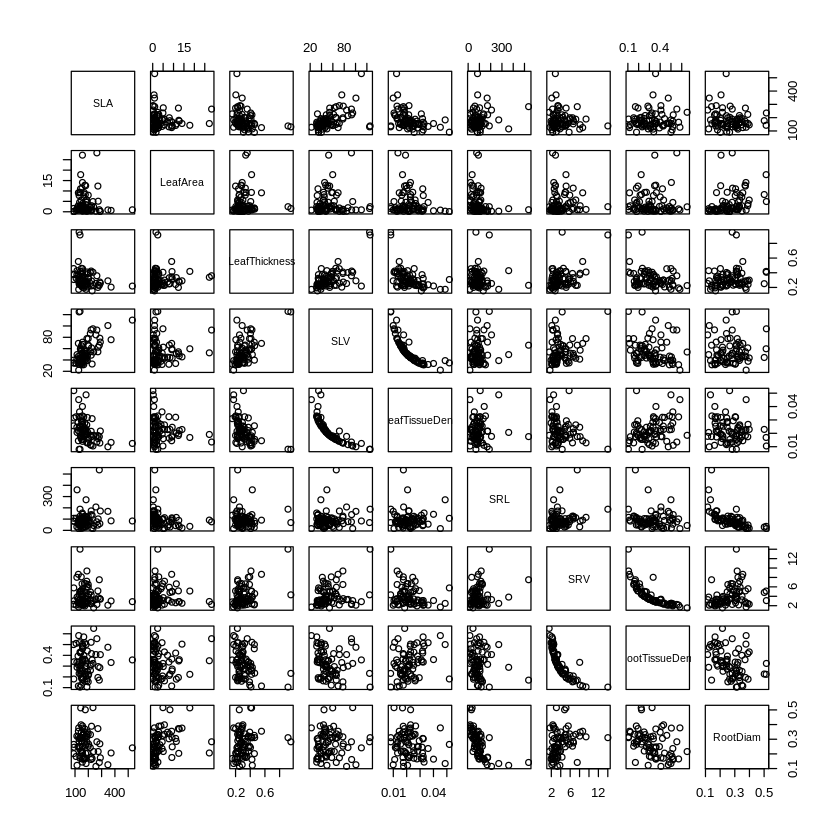

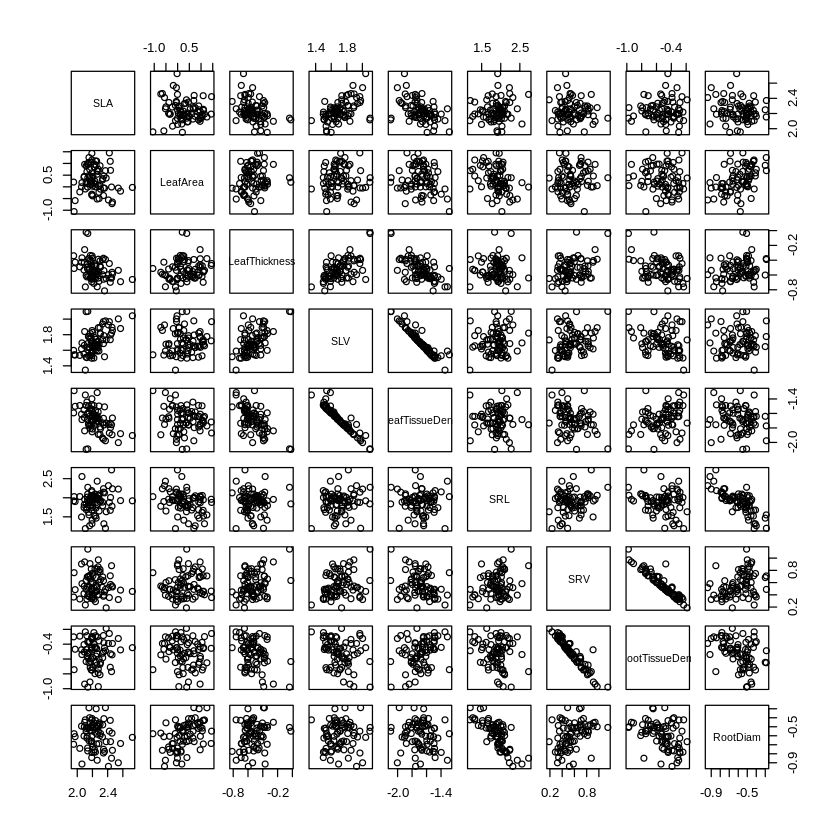

In [4]:
# Trait Data

traits <- read.csv("grassland_data/species.traits.csv", 
                   header = TRUE, row.names = 1)
head(traits)
pairs(traits)
traits <- log10(traits)
pairs(traits)

## Remarks:

It is easy to see the relationship or correlation between species or features when the data is compared as a matrix like this. I've come across these in the past, and I never understood why this isn't just a triangle; the plots on the upper half are just the same as the lower with switched axes.

In [5]:
# Metadata

metadata <- read.csv("grassland_data/plot.metadata.csv", 
                     header = TRUE, row.names = 1)
head(metadata)

habitat    site    slope aspect slope.position rel.moisture
mix-O-1 Mixedgrass Onefour  0    270    3.0            1           
mix-O-2 Mixedgrass Onefour 20    130    1.5            2           
mix-O-3 Mixedgrass Onefour  5     90    1.0            2           
mix-O-4 Mixedgrass Onefour  5     40    2.0            1           
mix-O-5 Mixedgrass Onefour  5    130    2.0            1           
mix-O-6 Mixedgrass Onefour  1     90    3.0            1

## Remarks:

The metadata is used to look at information about each sample. In this case, the habitat, specific site, and moisture level, among others. Not sure what "slope" is measuring--the actual slope of the landscape?

[1] "phylo"


Phylogenetic tree with 76 tips and 68 internal nodes.

Tip labels:
	Antennaria_neglecta, Antennaria_parvifolia, Erigeron_glabellus, Erigeron_pumilus, Heterotheca_villosa, Symphyotrichum_falcatum_var._falcatum, ...
Node labels:
	, , , , , , ...

Rooted; includes branch lengths.

[1] "edge"        "edge.length" "Nnode"       "node.label"  "tip.label"  
[6] "root.edge"

[1] "Antennaria_neglecta"   "Antennaria_parvifolia" "Erigeron_glabellus"   
[4] "Erigeron_pumilus"      "Heterotheca_villosa"

[1] 76

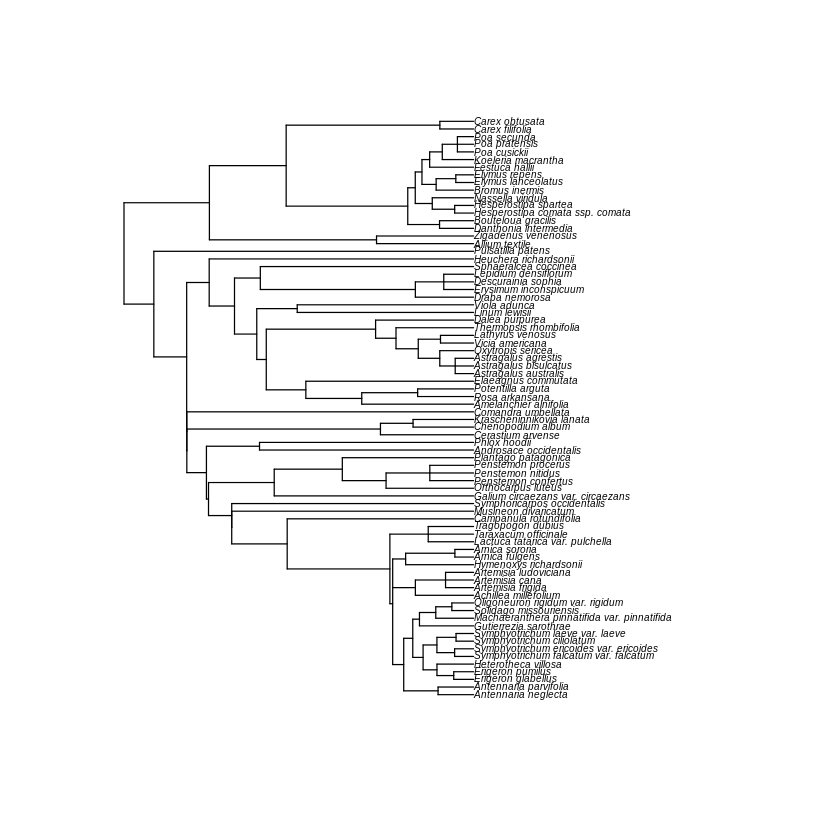

In [6]:
# Phylogeny

phy <- read.tree("grassland_data/grassland.phylogeny.newick")
class(phy)
phy

names(phy)
phy$tip.label[1:5]
Ntip(phy)
plot(phy, cex = 0.5)

## Remarks

The phylogeny function gives a diagram of the genetic similarities among species, allowing one to determine a numerical measurement indicating the genetic seperation between any given 2. 

In [7]:
# Cleaning and Matching Sets

ls()
combined <- match.phylo.comm(phy, comm)
phy <- combined$phy
comm <- combined$comm
combined <- match.phylo.data(phy, traits)
phy <- combined$phy
traits <- combined$data
all.equal(rownames(comm), rownames(metadata))
metadata <- metadata[rownames(comm), ]

[1] "combined"              "comm"                  "comm.bc.clust"        
 [4] "comm.bc.dist"          "comm.bc.mds"           "comm.mntd.dist"       
 [7] "comm.mntd.mds"         "comm.mntd.traits.dist" "comm.mntd.traits.mds" 
[10] "comm.pd"               "comm.sesmntd"          "comm.sesmpd"          
[13] "comm.sesmpd.traits"    "mds.fig"               "metadata"             
[16] "phy"                   "phy.dist"              "root.gls"             
[19] "root.pgls"             "trait.dist"            "traits"

[1] TRUE

## Remarks:

This simply allows datasets with similar information to be evaluated together. It eliminates any data that is not shared by all the datasets being evaluated.

ERROR: Error in t.test.formula(specnumber(comm) ~ metadata$rel.moisture): grouping factor must have exactly 2 levels


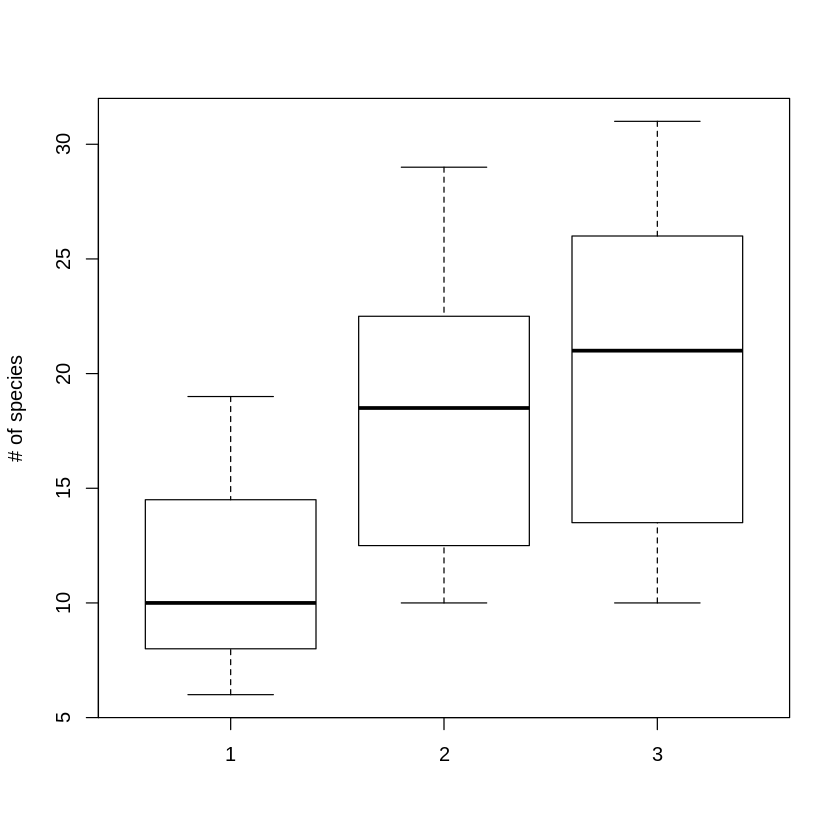

In [8]:
# Community Richness and diversity

boxplot(specnumber(comm) ~ metadata$rel.moisture, ylab = "# of species")
#t.test(specnumber(comm) ~ metadata$rel.moisture)
#plot(specaccum(comm), xlab = "# of samples", ylab = "# of species")

## Remarks:

Not sure what to use instead of t-test for the analysis of moisture...

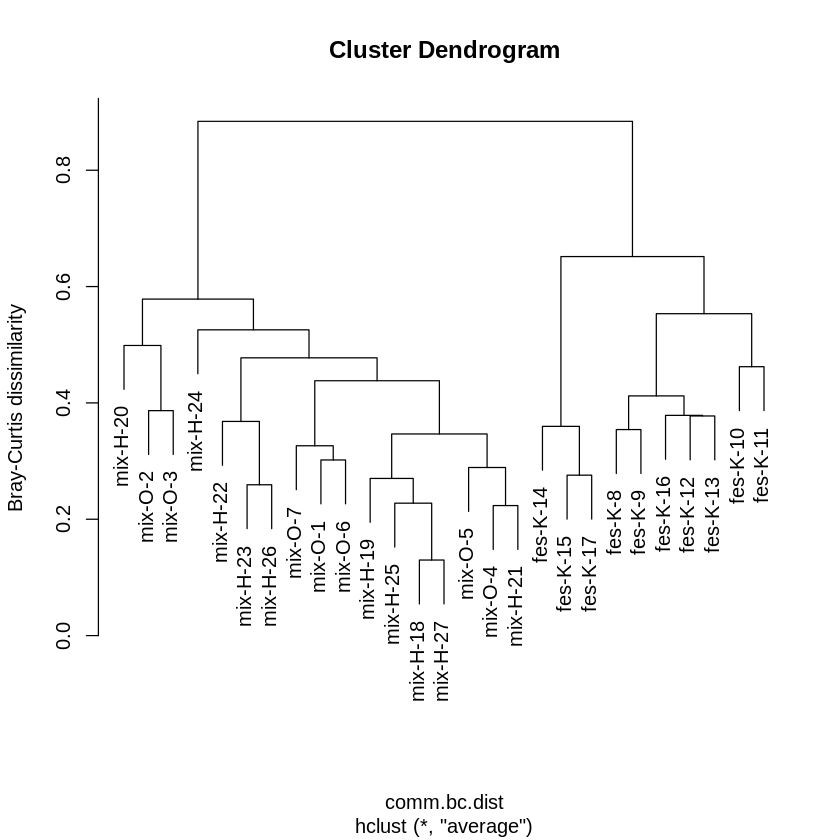

In [8]:
# Hierarchical clustering

comm.bc.dist <- vegdist(comm, method = "bray")
comm.bc.clust <- hclust(comm.bc.dist, method = "average")
plot(comm.bc.clust, ylab = "Bray-Curtis dissimilarity")

Run 0 stress 0.07174232 
Run 1 stress 0.07377276 
Run 2 stress 0.08063395 
Run 3 stress 0.07869152 
Run 4 stress 0.07480961 
Run 5 stress 0.0794151 
Run 6 stress 0.07173996 
... New best solution
... Procrustes: rmse 0.0003905141  max resid 0.001765493 
... Similar to previous best
Run 7 stress 0.07344513 
Run 8 stress 0.07173989 
... New best solution
... Procrustes: rmse 0.0004788569  max resid 0.002172887 
... Similar to previous best
Run 9 stress 0.07869136 
Run 10 stress 0.07941512 
Run 11 stress 0.07480958 
Run 12 stress 0.07914173 
Run 13 stress 0.08188746 
Run 14 stress 0.08269273 
Run 15 stress 0.07174046 
... Procrustes: rmse 0.0006134899  max resid 0.002785977 
... Similar to previous best
Run 16 stress 0.07886624 
Run 17 stress 0.07173973 
... New best solution
... Procrustes: rmse 0.0003678883  max resid 0.00166157 
... Similar to previous best
Run 18 stress 0.09124827 
Run 19 stress 0.07174126 
... Procrustes: rmse 0.0003898139  max resid 0.001784813 
... Similar to previ

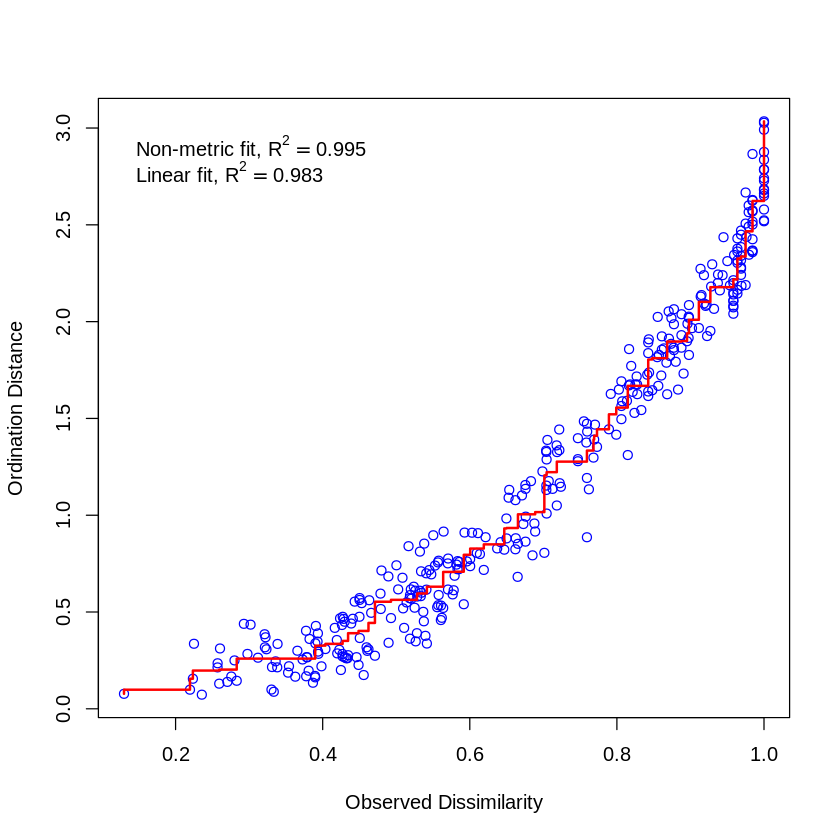

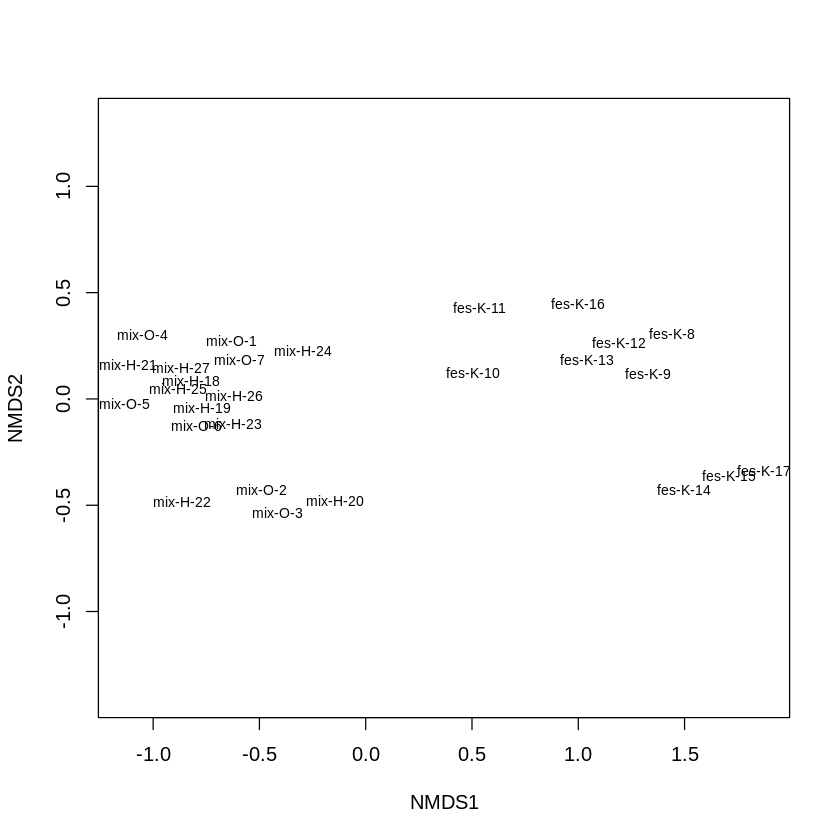

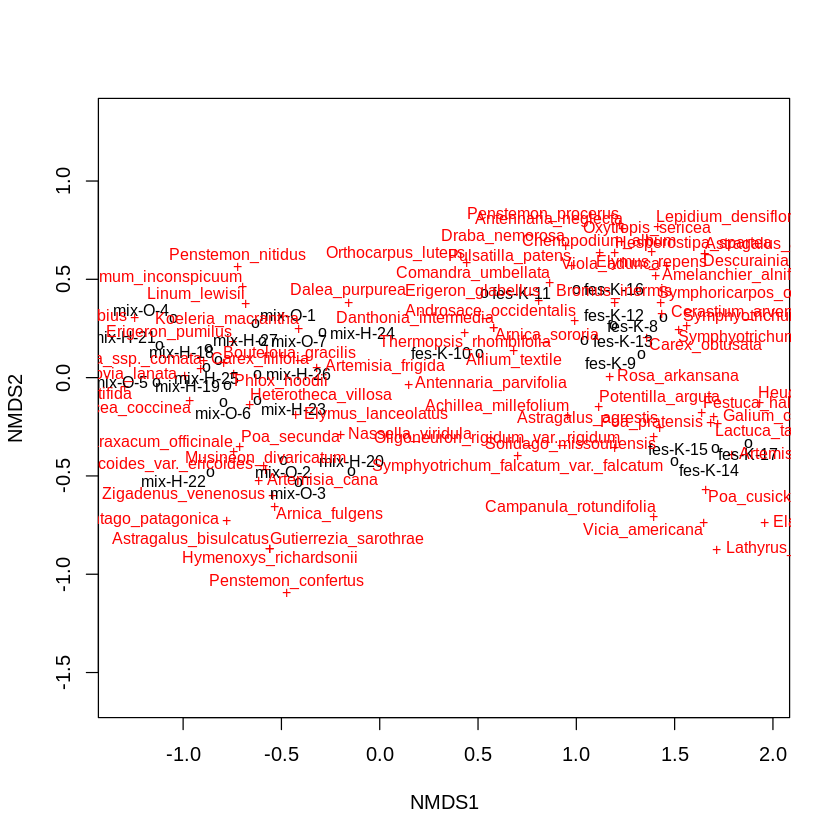

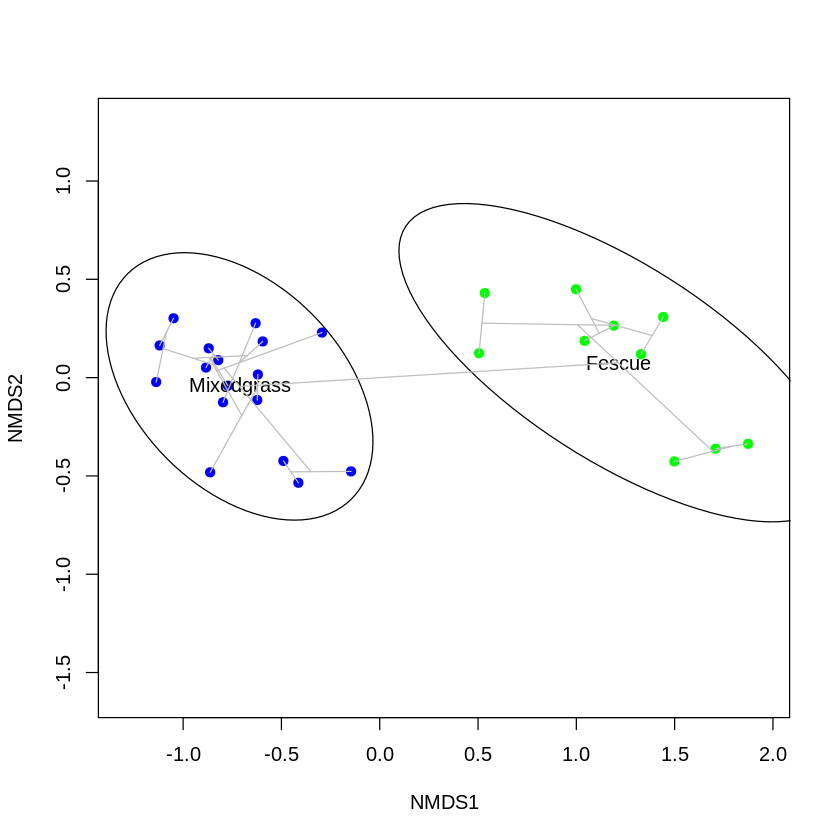


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x1, x2, k = 10, bs = "tp", fx = FALSE)

Estimated degrees of freedom:
4.31  total = 5.31 

REML score: -43.61948     

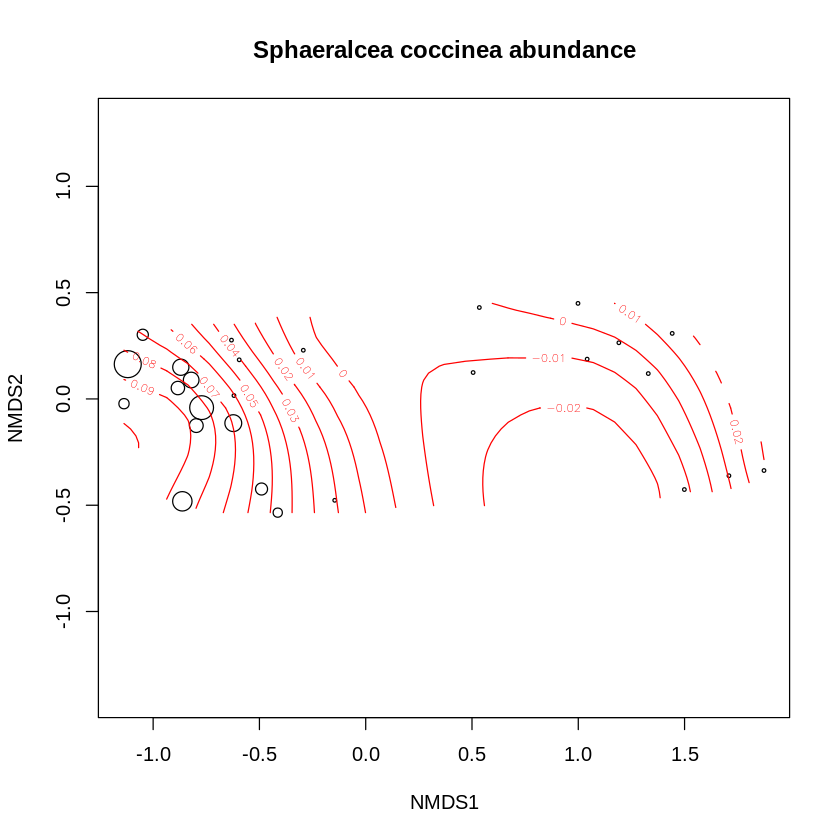

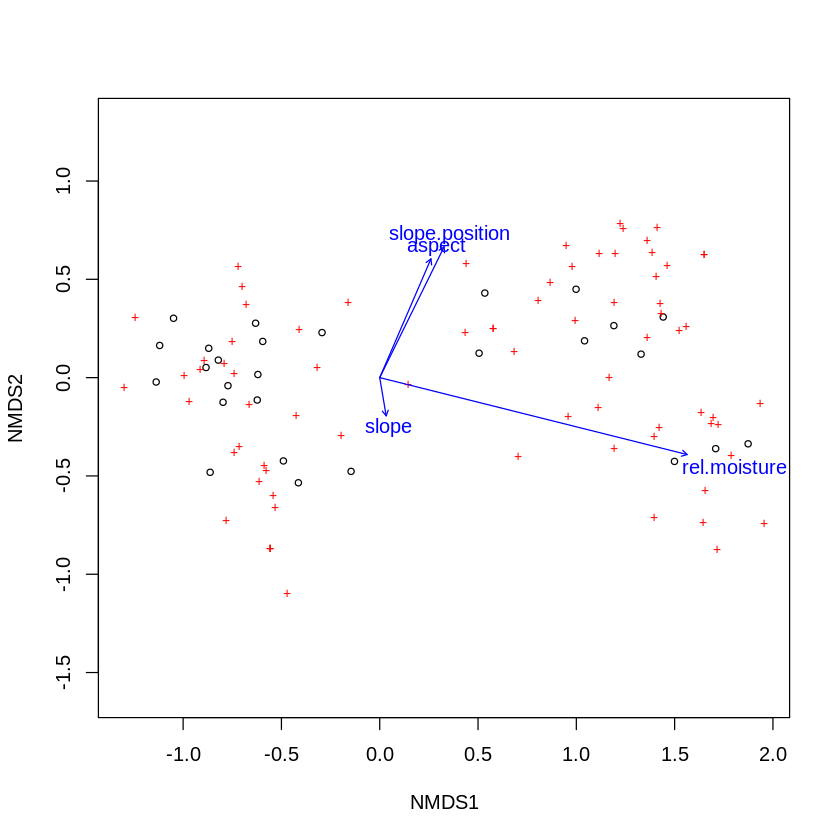

In [9]:
# Ordination

comm.bc.mds <- metaMDS(comm, dist = "bray")
stressplot(comm.bc.mds)
ordiplot(comm.bc.mds, display = "sites", type = "text")
ordipointlabel(comm.bc.mds)
mds.fig <- ordiplot(comm.bc.mds, type = "none")
points(mds.fig, "sites", pch = 19, col = "green", select = metadata$habitat == 
    "Fescue")
points(mds.fig, "sites", pch = 19, col = "blue", select = metadata$habitat == 
    "Mixedgrass")
ordiellipse(comm.bc.mds, metadata$habitat, conf = 0.95, label = TRUE)
ordicluster(comm.bc.mds, comm.bc.clust, col = "gray")
ordisurf(comm.bc.mds, comm[, "Sphaeralcea_coccinea"], bubble = TRUE, main = "Sphaeralcea coccinea abundance", 
    cex = 3)
ordiplot(comm.bc.mds)
plot(envfit(comm.bc.mds, metadata[, 3:6]))

SLA       LeafArea  LeafThickness            SLV LeafTissueDens 
     0.2563107      0.4231067      0.2418525      0.3310724      0.3298808 
           SRL            SRV RootTissueDens       RootDiam 
     0.2290093      0.2698531      0.2544904      0.3150881

K         PIC.variance.obs PIC.variance.rnd.mean PIC.variance.P
SLA            0.2563107 0.0006068179     0.0008478099          0.035         
LeafArea       0.4231067 0.0055507994     0.0132499012          0.001         
LeafThickness  0.2418525 0.0006669402     0.0008947001          0.071         
SLV            0.3310724 0.0005728618     0.0010776144          0.001         
LeafTissueDens 0.3298808 0.0006688721     0.0012321315          0.001         
SRL            0.2290093 0.0028408725     0.0036675045          0.073         
SRV            0.2698531 0.0011064783     0.0016611297          0.008         
RootTissueDens 0.2544904 0.0010609020     0.0015283407          0.010         
RootDiam       0.3150881 0.0005510416     0.0009850397          0.001         
               PIC.variance.Z
SLA            -1.589059     
LeafArea       -3.967744     
LeafThickness  -1.358820     
SLV            -3.201526     
LeafTissueDens -3.044972     
SRL            -1.353357     
SRV            -2.239519     
RootTissueDens -2.101456     
RootDiam       -2.955407

numDF F-value    p-value     
(Intercept) 1     611.077263 1.695116e-37
SRL         1       3.059154 8.442986e-02

numDF F-value  p-value     
(Intercept) 1     13.42163 4.646985e-04
SRL         1     20.07297 2.664634e-05

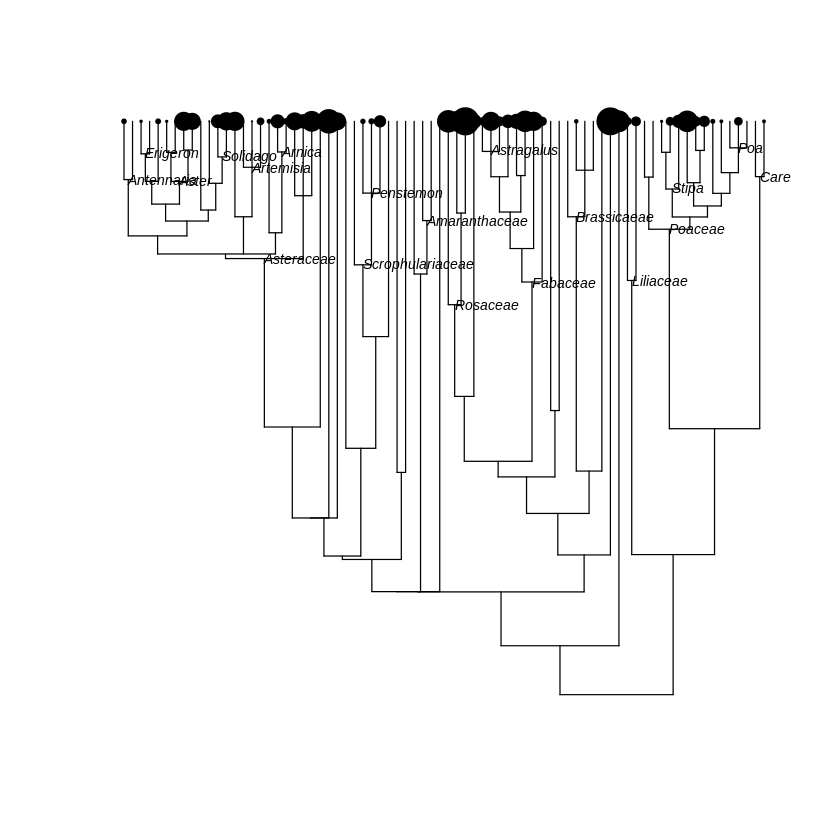

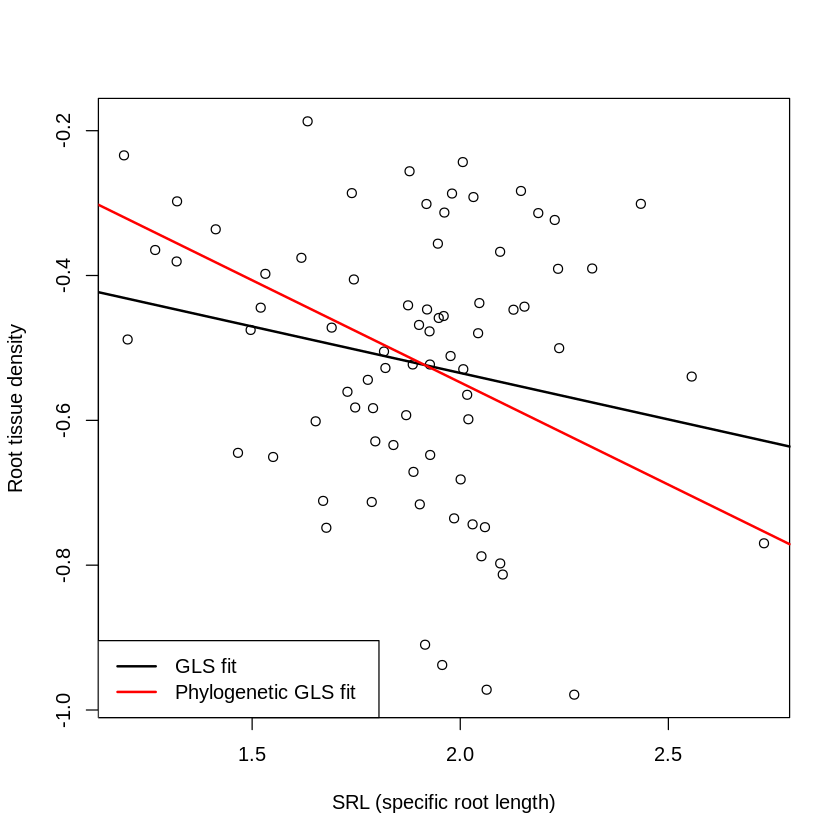

In [10]:
# Trait evaluation

apply(traits, 2, Kcalc, phy)
multiPhylosignal(traits, multi2di(phy))
plot(phy, direction = "up", show.tip.label = FALSE, show.node.label = TRUE, 
    cex = 0.7)
tiplabels(pch = 19, col = "black", cex = 3 * (traits[, "LeafArea"]/max(traits[, 
    "LeafArea"])))
root.gls <- gls(RootTissueDens ~ SRL, data = traits)
anova(root.gls)
root.pgls <- gls(RootTissueDens ~ SRL, correlation = corBrownian(value = 1, 
    phy), data = traits)
anova(root.pgls)
plot(RootTissueDens ~ SRL, data = traits, xlab = "SRL (specific root length)", 
    ylab = "Root tissue density")
abline(coef(root.gls), lwd = 2, col = "black")
abline(coef(root.pgls), lwd = 2, col = "red")
legend("bottomleft", legend = c("GLS fit", "Phylogenetic GLS fit"), lwd = 2, 
    col = c("black", "red"))

PD        SR
mix-O-1 1072.3697 16
mix-O-2 1475.4767 22
mix-O-3 1406.1708 21
mix-O-4  564.5899  6
mix-O-5  783.4028 10
mix-O-6 1028.5796 13


	Welch Two Sample t-test

data:  comm.pd$PD by metadata$habitat
t = 5.7161, df = 17.627, p-value = 2.195e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 451.1886 976.8551
sample estimates:
    mean in group Fescue mean in group Mixedgrass 
               1602.2371                 888.2153 


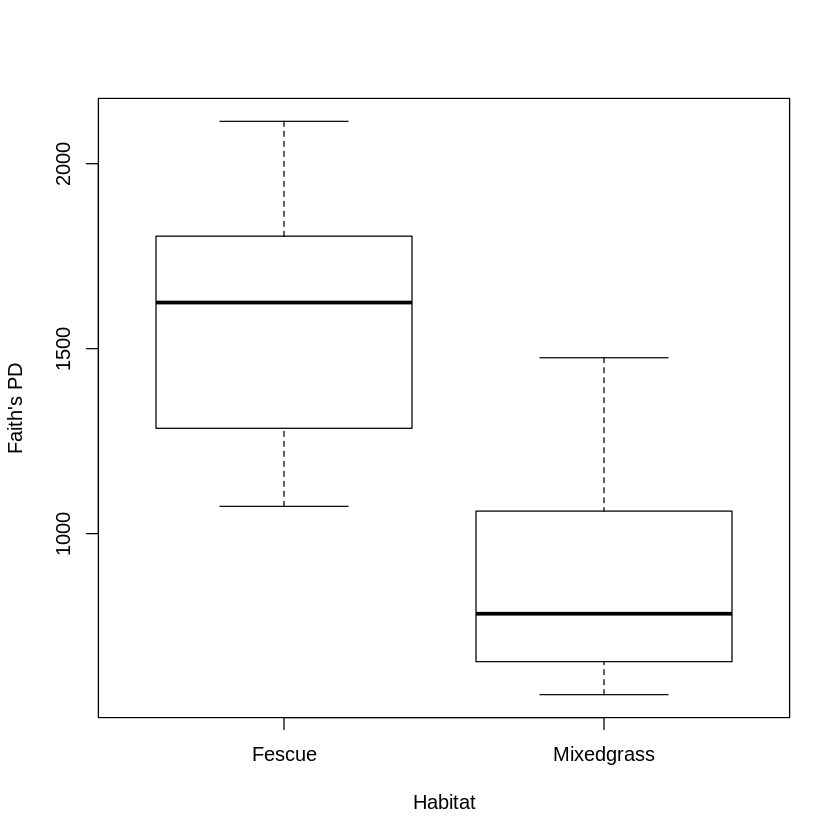

ntaxa mpd.obs  mpd.rand.mean mpd.rand.sd mpd.obs.rank mpd.obs.z  
mix-O-1 16    231.3054 239.0099      11.694362   225          -0.65881988
mix-O-2 22    239.5479 237.4964       9.489632   520           0.21617462
mix-O-3 21    236.5260 237.6283       9.824989   407          -0.11218876
mix-O-4  6    222.5255 240.5074      24.472139   179          -0.73479214
mix-O-5 10    234.2013 238.1623      16.465048   345          -0.24056740
mix-O-6 13    239.4120 238.4834      13.976519   463           0.06644065
        mpd.obs.p runs
mix-O-1 0.225     999 
mix-O-2 0.520     999 
mix-O-3 0.407     999 
mix-O-4 0.179     999 
mix-O-5 0.345     999 
mix-O-6 0.463     999

ntaxa mntd.obs  mntd.rand.mean mntd.rand.sd mntd.obs.rank mntd.obs.z
mix-O-1 16     94.98812 103.88253      19.81560     331           -0.4488589
mix-O-2 22     97.41972  93.28727      14.67876     618            0.2815260
mix-O-3 21     98.71519  95.49702      15.82350     585            0.2033794
mix-O-4  6    136.86094 154.13148      41.11611     323           -0.4200431
mix-O-5 10    107.36711 122.35699      28.25772     323           -0.5304701
mix-O-6 13    118.94915 112.87488      23.22490     610            0.2615409
        mntd.obs.p runs
mix-O-1 0.331      999 
mix-O-2 0.618      999 
mix-O-3 0.585      999 
mix-O-4 0.323      999 
mix-O-5 0.323      999 
mix-O-6 0.610      999

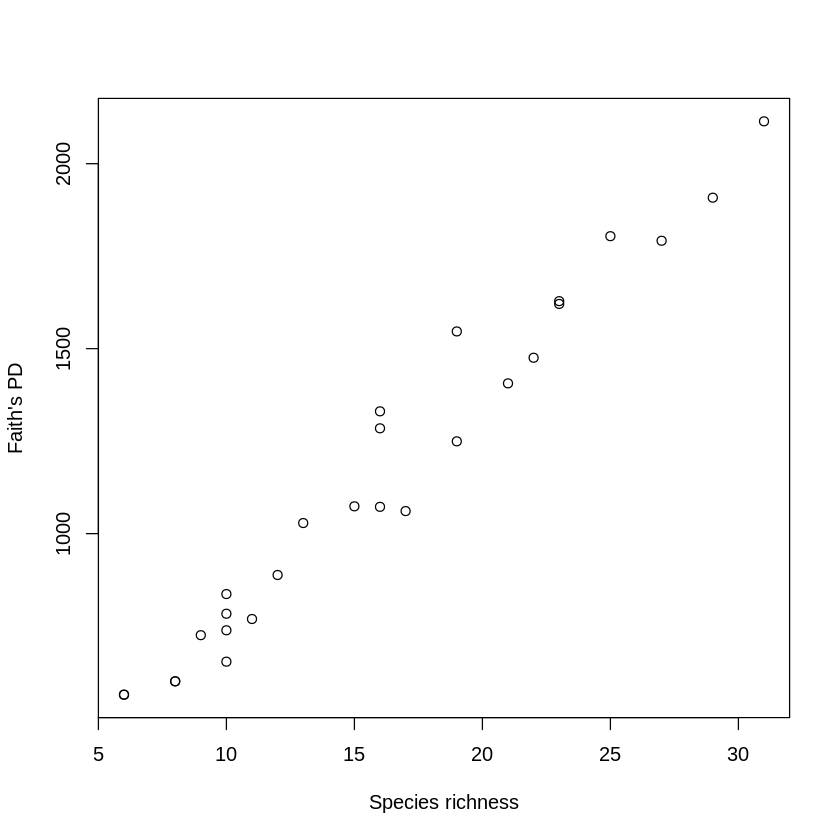


	Welch Two Sample t-test

data:  comm.sesmpd$mpd.obs.z by metadata$habitat
t = 6.1315, df = 20.437, p-value = 4.944e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.227104 2.489917
sample estimates:
    mean in group Fescue mean in group Mixedgrass 
               0.8486054               -1.0099052 


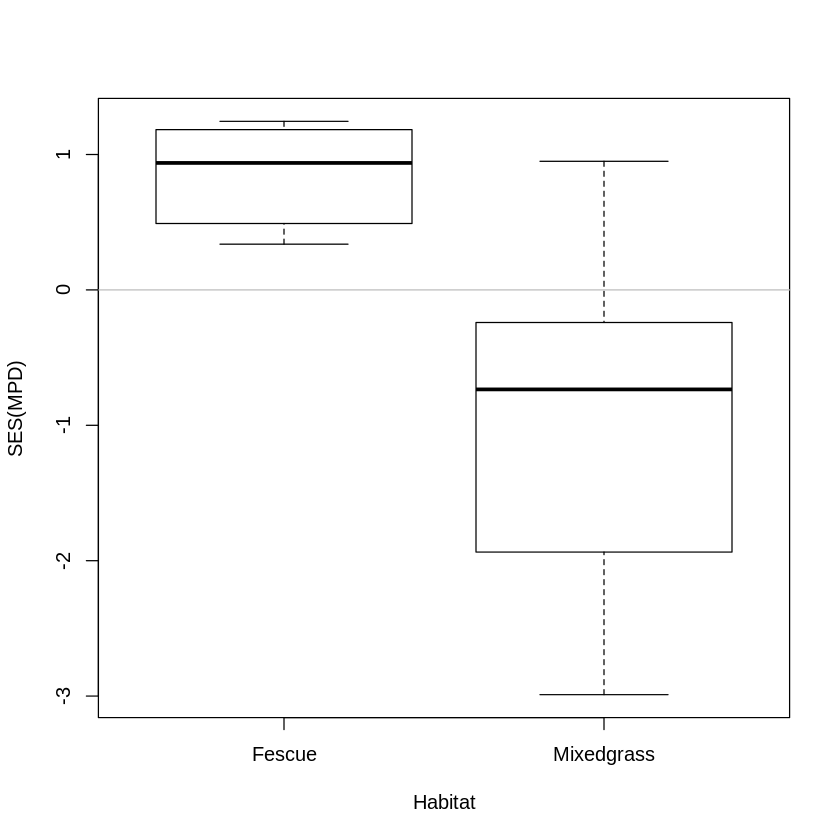


	Welch Two Sample t-test

data:  comm.sesmntd$mntd.obs.z by metadata$habitat
t = 2.7861, df = 14.382, p-value = 0.01428
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2265438 1.7256379
sample estimates:
    mean in group Fescue mean in group Mixedgrass 
               0.5921748               -0.3839161 


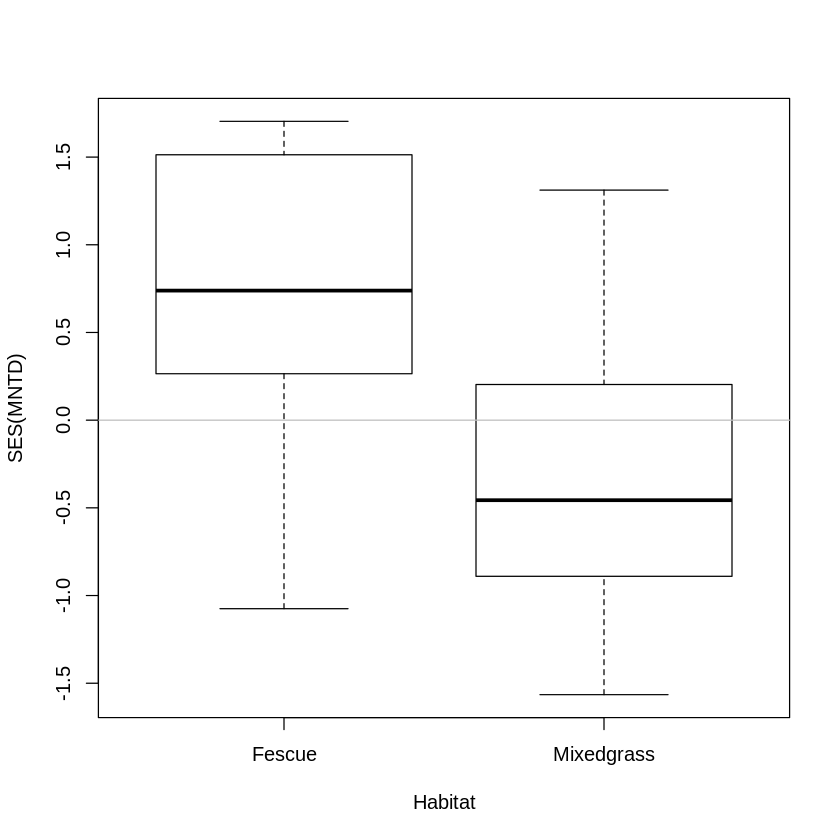

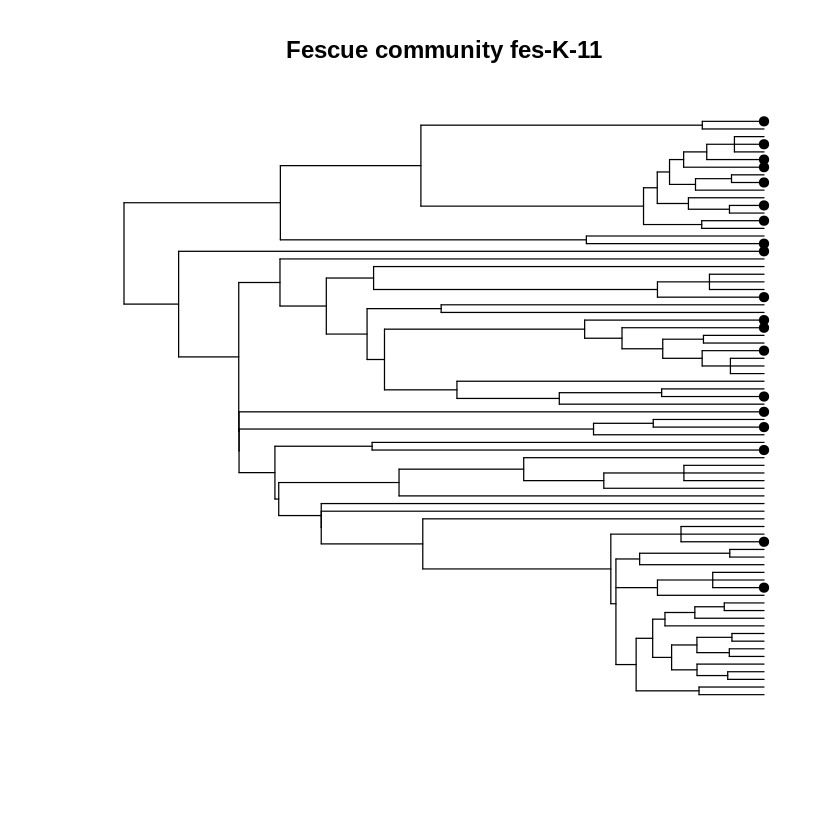

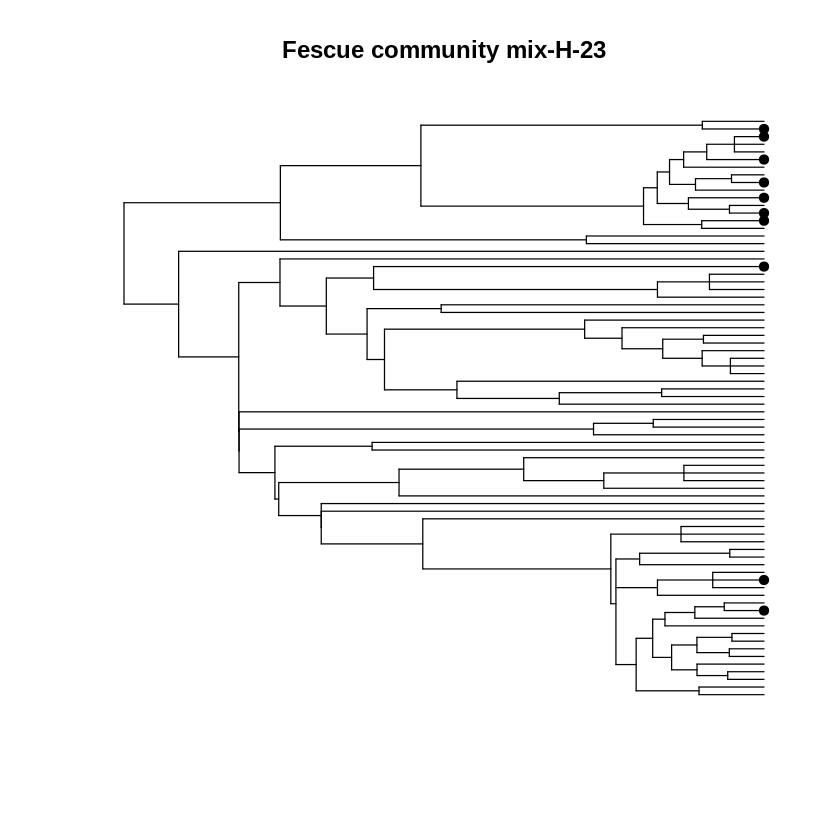

In [11]:
# Phylogenetic diversity

comm.pd <- pd(comm, phy)
head(comm.pd)
boxplot(comm.pd$PD ~ metadata$habitat, xlab = "Habitat", ylab = "Faith's PD")
t.test(comm.pd$PD ~ metadata$habitat)
plot(comm.pd$PD ~ comm.pd$SR, xlab = "Species richness", ylab = "Faith's PD")
phy.dist <- cophenetic(phy)
comm.sesmpd <- ses.mpd(comm, phy.dist, null.model = "richness", abundance.weighted = FALSE, 
    runs = 999)
head(comm.sesmpd)
comm.sesmntd <- ses.mntd(comm, phy.dist, null.model = "richness", abundance.weighted = FALSE, 
    runs = 999)
head(comm.sesmntd)
plot(comm.sesmpd$mpd.obs.z ~ metadata$habitat, xlab = "Habitat", ylab = "SES(MPD)")
abline(h = 0, col = "gray")
t.test(comm.sesmpd$mpd.obs.z ~ metadata$habitat)
plot(comm.sesmntd$mntd.obs.z ~ metadata$habitat, xlab = "Habitat", ylab = "SES(MNTD)")
abline(h = 0, col = "gray")
t.test(comm.sesmntd$mntd.obs.z ~ metadata$habitat)
plot(phy, show.tip.label = FALSE, main = "Fescue community fes-K-11")
tiplabels(tip = which(phy$tip.label %in% colnames(comm)[comm["fes-K-11", ] > 
    0]), pch = 19)
plot(phy, show.tip.label = FALSE, main = "Fescue community mix-H-23")
tiplabels(tip = which(phy$tip.label %in% colnames(comm)[comm["mix-H-23", ] > 
    0]), pch = 19)

$\(MPD\), \(MNTD\), \(SES_{MPD}\) and \(SES_{MNTD}\)$

$\(SES_{metric} = \frac{ Metric_{observed} - mean(Metric_{null}) }{sd(Metric_{null})}\)$

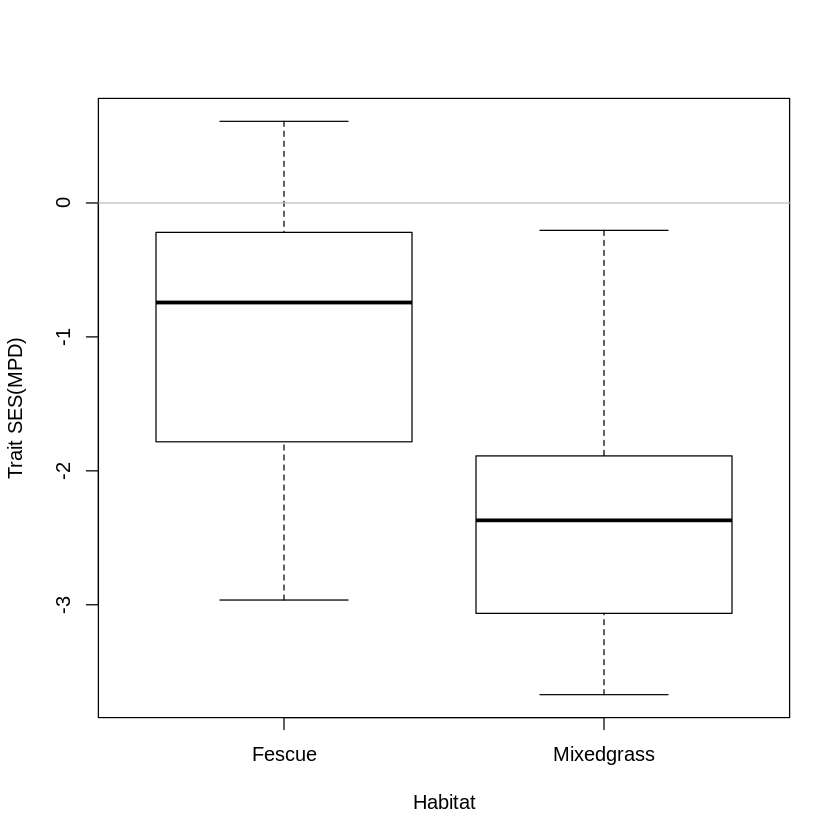

In [12]:
# Trait diversity

trait.dist <- as.matrix(dist(scale(traits), method = "euclidean"))
comm.sesmpd.traits <- ses.mpd(comm, trait.dist, null.model = "richness", abundance.weighted = FALSE, 
    runs = 999)
plot(comm.sesmpd.traits$mpd.obs.z ~ metadata$habitat, xlab = "Habitat", ylab = "Trait SES(MPD)")
abline(h = 0, col = "gray")

In [13]:
# Phylogenetic beta-diversity

comm.mntd.dist <- comdistnt(comm, phy.dist, abundance.weighted = TRUE)
comm.mntd.traits.dist <- comdistnt(comm, trait.dist, abundance.weighted = TRUE)
mantel(comm.bc.dist, comm.mntd.dist)
mantel(comm.bc.dist, comm.mntd.traits.dist)


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = comm.bc.dist, ydis = comm.mntd.dist) 

Mantel statistic r: 0.8597 
      Significance: 0.001 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0745 0.1013 0.1303 0.1753 
Permutation: free
Number of permutations: 999



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = comm.bc.dist, ydis = comm.mntd.traits.dist) 

Mantel statistic r: 0.9524 
      Significance: 0.001 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0826 0.1199 0.1688 0.2476 
Permutation: free
Number of permutations: 999


species scores not available
species scores not available


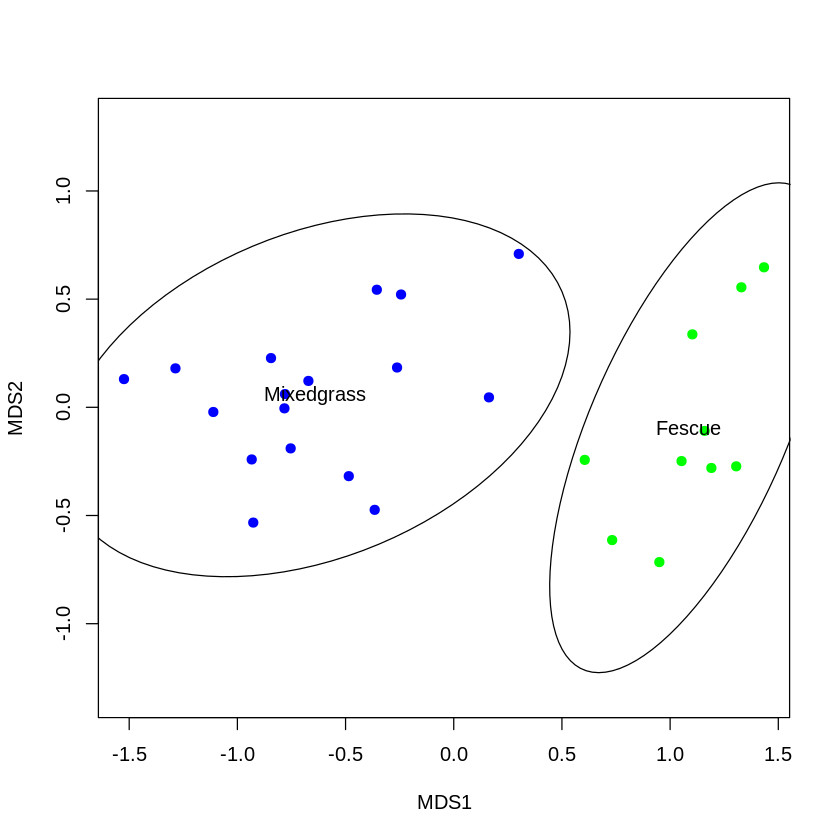

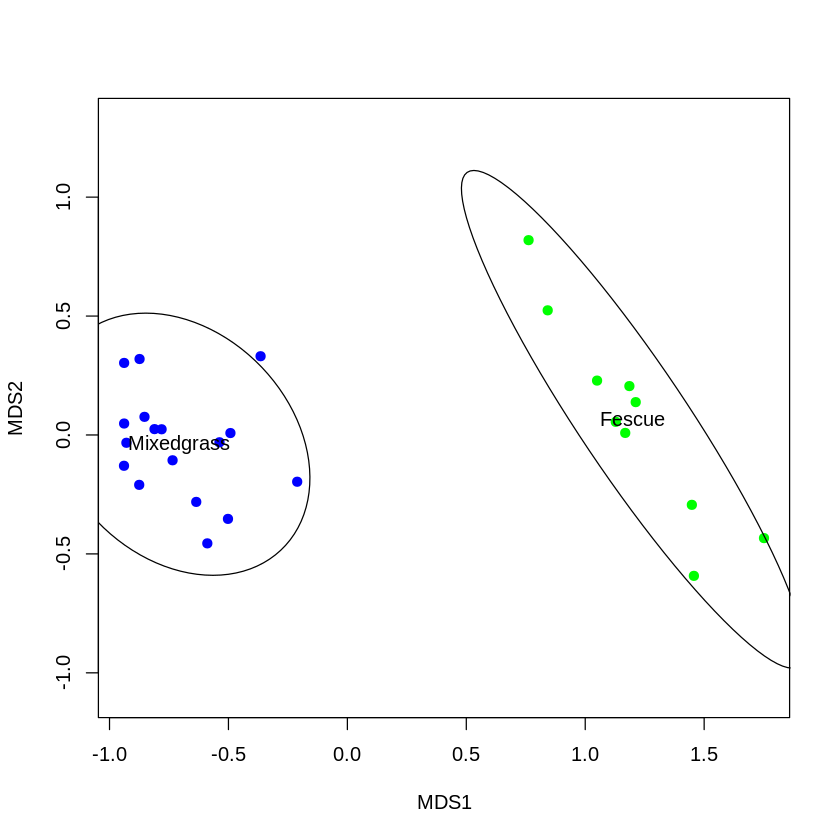

In [14]:
# Phylogeny/trait-based ordinations

comm.mntd.mds <- monoMDS(comm.mntd.dist)
mds.fig <- ordiplot(comm.mntd.mds, type = "none")
points(mds.fig, "sites", pch = 19, col = "green", select = metadata$habitat == 
    "Fescue")
points(mds.fig, "sites", pch = 19, col = "blue", select = metadata$habitat == 
    "Mixedgrass")
ordiellipse(comm.mntd.mds, metadata$habitat, conf = 0.95, label = TRUE)
comm.mntd.traits.mds <- monoMDS(comm.mntd.traits.dist)
mds.fig <- ordiplot(comm.mntd.traits.mds, type = "none")
points(mds.fig, "sites", pch = 19, col = "green", select = metadata$habitat == 
    "Fescue")
points(mds.fig, "sites", pch = 19, col = "blue", select = metadata$habitat == 
    "Mixedgrass")
ordiellipse(comm.mntd.traits.mds, metadata$habitat, conf = 0.95, label = TRUE)


In [15]:
# Testing for multivariate differences among groups

adonis(comm.bc.dist ~ habitat, data = metadata)
adonis(comm.mntd.dist ~ habitat, data = metadata)
adonis(comm.mntd.traits.dist ~ habitat, data = metadata)



Call:
adonis(formula = comm.bc.dist ~ habitat, data = metadata) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
habitat    1    3.3656  3.3656  25.124 0.50123  0.001 ***
Residuals 25    3.3490  0.1340         0.49877           
Total     26    6.7146                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = comm.mntd.dist ~ habitat, data = metadata) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
habitat    1     22814 22813.7  34.904 0.58267  0.001 ***
Residuals 25     16340   653.6         0.41733           
Total     26     39154                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = comm.mntd.traits.dist ~ habitat, data = metadata) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
habitat    1   10.9154 10.9154  63.959 0.71897  0.001 ***
Residuals 25    4.2666  0.1707         0.28103           
Total     26   15.1820                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Remarks:

None. I just wanted to get this done and move on with the course...